In [1]:
import numpy as np
import pandas as pd

<div style="background-color:green; padding: 10px; border-radius: 5px;text-align: center;">
<h3 style="color: white;">DATA COLLECTION </h3>
</div>

In [2]:
# Load the dataset
data = pd.read_csv('messy_data.csv')
data

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...,...
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


<div style="background-color:green; padding: 10px; border-radius: 5px;text-align: center;">
<h3 style="color: white;">DATA DESCRIPTION</h3>
</div>


The dataset contains several columns related to employee records, including:

- ID: A unique identifier for each employee, with no missing values.
- Name: Employee names, with inconsistencies like missing values, irregular capitalization, and extra characters.
- Age: Represents employee age, with some missing entries.
- Email: Contains email addresses, many of which are missing or incorrectly formatted.
- Join Date: Shows when employees joined, but contains missing values and inconsistent date formats.
- Salary: Employee salary data with missing values and noisy outliers that affect the overall distribution.
- Department: The department each employee belongs to, but with typographical errors and inconsistent naming.

The dataset had issues such as missing values, inconsistent formatting, and outliers, all of which needed to be addressed for proper analysis.

In [3]:
# Get an overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


In [4]:
# Check the first few rows to understand the data structure
data.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [5]:
data.shape

(11000, 8)

<div style="background-color:green; padding: 10px; border-radius: 5px;text-align: center;">
<h3 style="color: white;">EDA (Exploratory Data Analysis) </h3>
</div>

In [6]:
# View columns in the dataset
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Email', 'Join Date', 'Salary',
       'Department'],
      dtype='object')

In [7]:
# View a statistical summary of numeric columns
data.describe()

,Unnamed: 0,Age,Salary
count,11000.000000,9253.000000,8761.000000
mean,5012.947818,54.162650,89886.585012
std,2884.739158,21.072919,34896.320117
min,0.000000,18.000000,24655.136613
25%,2509.750000,36.000000,59723.844874
50%,5024.500000,54.000000,89241.000000
75%,7510.250000,72.000000,119491.000000
max,9999.000000,90.000000,176156.206747


In [8]:
# Check the unique values in categorical columns (e.g., Department, Name)
data.nunique()

Unnamed: 0    10000
ID            10000
Name           7929
Age              73
Email          9160
Join Date      3338
Salary         8122
Department      264
dtype: int64

In [9]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Number of duplicate rows: ", duplicate_rows)


Number of duplicate rows:  291


In [10]:
# Display data types
print("Data Types:\n", data.dtypes)

Data Types:
 Unnamed: 0      int64
ID             object
Name           object
Age           float64
Email          object
Join Date      object
Salary        float64
Department     object
dtype: object


In [11]:
# Check for any obvious data type mismatches
for column in data.columns:
    if data[column].dtype == 'object':
        # Check for unique values to spot inconsistencies
        print(f"Unique values in {column}: {data[column].unique()[:5]}")  # Display a sample of 5 unique values


Unique values in ID: ['1e407ff9-6255-489d-a0de-34135d4f74bd'
 '379f55b8-87d5-4739-a146-7400b78c24d1'
 '18261368-dfa1-47f0-afc6-bddf45926b07'
 'ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5'
 '14ed3e6a-e0f5-4bbe-8d93-8665267f5c90']
Unique values in Name: ['Hunter Thomas' 'Jeremy Irwin' 'Jennifer Hammondquickly'
 'Sydney Taylorso' 'Julia Lee']
Unique values in Email: ['xlopez@hotmail.com' 'Jillian Jenkins' 'jscottgreen.biz'
 'luke56gonzalez.com' 'figueroakayla@yahoo.com']
Unique values in Join Date: [nan '2022-07-07' '2023-11-21' '2021-11-05' '15/10/2016']
Unique values in Department: ['Sales' nan 'Engineering' 'SupportJ' 'Marketing']


#### QA Issues Field-wise for the Dataset:

In [12]:
# Check for invalid email addresses
invalid_emails = data['Email'][~data['Email'].str.contains(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$', na=False)]
print("Invalid email addresses:\n", invalid_emails)


Invalid email addresses:
 1                 Jillian Jenkins
2                 jscottgreen.biz
3              luke56gonzalez.com
6             pperkinshotmail.com
7        josephrobertsongmail.com
                   ...           
10978                         NaN
10988                         NaN
10993              Michael Walker
10995                         NaN
10996            molly89gmail.com
Name: Email, Length: 3699, dtype: object


In [13]:
# Check for names with leading/trailing spaces or special characters
invalid_names = data['Name'][data['Name'].str.contains(r'[^a-zA-Z\s]', na=False)]
print("Invalid names with special characters or spaces:\n", invalid_names)


Invalid names with special characters or spaces:
 63            Mrs. Sheri Duffyparty
74              Mr. Larry Mcpherson
90       Mrs. Betty Robinsonmission
225            Mrs. Karen Robertson
269                Dr. Alex Collins
                    ...            
10500             Mrs. Amanda Smith
10609      Mr. Juan Dixonparticular
10661              Mrs. Linda Young
10779             Mrs. Laura Howard
10831        Mrs. Kimberly Martinez
Name: Name, Length: 149, dtype: object


In [14]:
# Identify unreasonable salary values (assuming valid salary range between 20,000 and 200,000)
unreasonable_salaries = data[(data['Salary'] < 20000) | (data['Salary'] > 200000)]
print("\nUnreasonable Salaries:\n", unreasonable_salaries)


Unreasonable Salaries:
 Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Email, Join Date, Salary, Department]
Index: []


In [15]:
# Check salary statistics
print("Salary Summary:\n", data['Salary'].describe())

# Check for salaries outside a reasonable range (assuming realistic limits)
unreasonable_salaries = data[(data['Salary'] < 20000) | (data['Salary'] > 200000)]
print("Unreasonable salaries:\n", unreasonable_salaries)


Salary Summary:
 count      8761.000000
mean      89886.585012
std       34896.320117
min       24655.136613
25%       59723.844874
50%       89241.000000
75%      119491.000000
max      176156.206747
Name: Salary, dtype: float64
Unreasonable salaries:
 Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Email, Join Date, Salary, Department]
Index: []


In [16]:
# Check for any issues with 'Join Date' column
print("Join Date issues:")
invalid_dates = data['Join Date'][pd.to_datetime(data['Join Date'], errors='coerce').isna()]
print("Invalid dates:\n", invalid_dates)


Join Date issues:
Invalid dates:
 0               NaN
4               NaN
5        15/10/2016
6        17/09/2020
10              NaN
            ...    
10989    01/05/1982
10993    25/12/1992
10994           NaN
10995           NaN
10997    15/08/2006
Name: Join Date, Length: 4010, dtype: object


In [17]:
# Check for unique department names to identify typos or inconsistencies
unique_departments = data['Department'].unique()
print("Unique department names:\n", unique_departments)


Unique department names:
 ['Sales' nan 'Engineering' 'SupportJ' 'Marketing' 'SupportE' 'HR'
 'Support' 'HRC' 'SalesA' 'SalesX' 'Supportu' 'Engineeringi' 'MarketingR'
 'Salesw' 'SalesK' 'MarketingU' 'Salesi' 'HRa' 'SalesG' 'Supporty'
 'SalesN' 'Marketinge' 'Marketingv' 'HRv' 'SalesM' 'EngineeringL'
 'MarketingQ' 'HRs' 'SalesW' 'Supportj' 'Salesd' 'Marketingu'
 'Engineeringj' 'SalesU' 'HRO' 'MarketingH' 'Salesj' 'Saleso' 'SalesZ'
 'Engineeringe' 'MarketingF' 'Marketingr' 'Engineeringm' 'HRW' 'HRt' 'HRz'
 'Engineeringp' 'HRF' 'EngineeringS' 'SupportW' 'EngineeringT' 'SalesC'
 'SalesB' 'SupportC' 'SalesY' 'Marketingn' 'EngineeringK' 'Marketingz'
 'HRo' 'SupportB' 'HRi' 'Salest' 'Supportg' 'Supporta' 'HRn' 'SupportQ'
 'Salesr' 'EngineeringG' 'Supportm' 'Supporto' 'EngineeringH' 'Marketingw'
 'EngineeringM' 'Supportz' 'HRr' 'Salesy' 'MarketingD' 'HRE' 'Marketingm'
 'HRw' 'Marketingo' 'Supportk' 'MarketingN' 'SupportS' 'EngineeringD'
 'Marketingp' 'Salesl' 'MarketingI' 'MarketingL' 'SupportT'

In [18]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0       0
ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64


1. Unnamed: 0 (Index column)
Issue: Unnecessary column likely created during file export.
2. ID
Issue: No missing values; assumed to be a unique identifier.
3. Name
Issues:
2333 missing values.
Possible inconsistencies in formatting (e.g., extra characters, non-alphabetic symbols).
Noise or unnecessary information in some names.
4. Age
Issues:
1747 missing values.
Outliers or unrealistic values may exist (e.g., very high or negative ages).
5. Email
Issues:
1269 missing values.
Invalid or unprofessional email formats.
Noise in email data (e.g., personal email domains like Gmail, Yahoo).
6. Join Date
Issues:
2192 missing values.
Inconsistent date formats (e.g., mix of MM-DD-YYYY, YYYY-MM-DD).
Possible future dates or incorrect past dates.
7. Salary
Issues:
2239 missing values.
Presence of outliers (e.g., extremely high or low salaries).
Noise or unrealistic salary values (e.g., incorrect entries).
8. Department
Issues:
2255 missing values.
Typographical errors in department names (e.g., Engneering instead of Engineering).
Inconsistent casing or spacing.


<div style="background-color:green; padding: 10px; border-radius: 5px;text-align: center;">
<h3 style="color: white;">DATA PREPROCESSING</h3>
</div>

#### Handle Missing Values

There's an unwanted index column like Unnamed: 0, so droping it.

In [19]:
# Drop the 'Unnamed: 0' column if it exists
data_cleaned = data.drop(columns=['Unnamed: 0'], errors='ignore')

# Check the result
data_cleaned.head()

,ID,Name,Age,Email,Join Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [20]:
# Fill missing values for 'Age' and 'Salary' with the median
data_cleaned['Age'].fillna(data_cleaned['Age'].median(), inplace=True)
data_cleaned['Salary'].fillna(data_cleaned['Salary'].median(), inplace=True)

# Drop rows with missing 'Name', 'Email', 'Join Date', or 'Department'
data_cleaned.dropna(subset=['Name', 'Email', 'Join Date', 'Department'], inplace=True)

# Check for remaining missing values after handling
print(data_cleaned.isnull().sum())


ID            0
Name          0
Age           0
Email         0
Join Date     0
Salary        0
Department    0
dtype: int64


Median Imputation: For numeric columns like Age and Salary, using the median is a good option since it is robust to outliers and ensures that the central tendency of the data is preserved.

Dropping Rows: Since fields like Name, Email, Join Date, and Department are critical, missing values in these fields would significantly impact analysis. It’s best to drop rows that are missing these values.


#### Remove Duplicates:

In [21]:
# Check for duplicates in the dataset
duplicates = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 69


In [22]:
# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Verify that duplicates have been removed
duplicates_after = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows after removal: 0


#### Correcting Email Formats:

In [23]:
import re

# Define a regex pattern to identify valid email formats (username@domain.com)
email_pattern = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'

# Check for invalid email formats
invalid_emails = data_cleaned[~data_cleaned['Email'].str.match(email_pattern, na=False)]
print(f"Number of invalid email addresses: {len(invalid_emails)}")


Number of invalid email addresses: 1753


In [24]:
# Drop rows with invalid email formats
data_cleaned = data_cleaned[data_cleaned['Email'].str.match(email_pattern, na=False)]

In [25]:
# Filter for professional email domains (excluding common personal domains like Gmail, Yahoo, etc.)
non_professional_domains = ['gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com']

# Extract domain from email and filter for professional domains
data_cleaned['Email Domain'] = data_cleaned['Email'].apply(lambda x: x.split('@')[1])
data_cleaned = data_cleaned[~data_cleaned['Email Domain'].isin(non_professional_domains)]

# Drop the 'Email Domain' column as it was used for filtering
data_cleaned.drop(columns=['Email Domain'], inplace=True)

# Verify the remaining emails
print("Sample of valid and professional emails:")
print(data_cleaned['Email'].head())

Sample of valid and professional emails:
5     milleryvonne@fowler-york.com
9         denisemaynard@jordan.com
14       griffinlinda@harrison.com
16         longjennifer@parker.biz
21             amyclements@lee.biz
Name: Email, dtype: object


#### Clean Name Fields:

In [26]:
print(data_cleaned.columns)

Index(['ID', 'Name', 'Age', 'Email', 'Join Date', 'Salary', 'Department'], dtype='object')


In [27]:
import re

# Function to clean the name fields by removing noise
def clean_name(name):
    # Remove any non-alphabetic characters (e.g., numbers, special characters)
    clean_name = re.sub(r'[^a-zA-Z\s]', '', name)
    # Standardize to title case (capitalize the first letter of each word)
    return clean_name.title()

# Apply the cleaning function to the 'Name' column
data_cleaned['Name'] = data_cleaned['Name'].apply(lambda x: clean_name(x) if pd.notnull(x) else x)

# Verify cleaned names by checking the first few rows
print("Sample of cleaned names:")
print(data_cleaned['Name'].head())

Sample of cleaned names:
5         Lisa Bailey
9          Jay Fisher
14    Nicole Cardenas
16       Mark Wilkins
21    Danny Martinred
Name: Name, dtype: object


#### Standardise Date Formats:

In [28]:
# Convert 'Join Date' to datetime format and handle errors (e.g., invalid dates)
# errors='coerce' will convert invalid dates to NaT (Not a Time)
data_cleaned['Join Date'] = pd.to_datetime(data_cleaned['Join Date'], errors='coerce')

# Drop rows where 'Join Date' is still NaT (invalid dates)
data_cleaned.dropna(subset=['Join Date'], inplace=True)

# Format the dates in 'YYYY-MM-DD' format
data_cleaned['Join Date'] = data_cleaned['Join Date'].dt.strftime('%Y-%m-%d')

# Verify the standardized dates
print("Sample of standardized 'Join Date':")
print(data_cleaned['Join Date'].head())


Sample of standardized 'Join Date':
5     2016-10-15
14    2003-10-16
16    1991-02-17
23    1989-10-06
57    2014-11-19
Name: Join Date, dtype: object


C:\Users\hp\AppData\Local\Temp\ipykernel_9256\4241413652.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_cleaned['Join Date'] = pd.to_datetime(data_cleaned['Join Date'], errors='coerce')


#### Correct Department Names:

In [29]:
# Review the unique department names before cleaning
print("Unique department names before cleaning:")
print(data_cleaned['Department'].unique())

Unique department names before cleaning:
['SupportE' 'Marketing' 'SalesX' 'Engineeringi' 'HR' 'Marketingv' 'Sales'
 'Salesj' 'Supporto' 'Engineering' 'Salesy' 'Marketingm' 'Support'
 'Marketingp' 'SupportT' 'EngineeringR' 'MarketingQ' 'Saless' 'MarketingO'
 'SalesI' 'Salesu' 'Supportk' 'Marketingk' 'Supportp' 'Engineeringz'
 'Engineeringl' 'HRm' 'Supportd' 'EngineeringJ' 'HRq' 'SupportL' 'Salese'
 'HRX' 'MarketingN' 'MarketingE' 'EngineeringZ' 'Supporta' 'Engineeringh'
 'Salesl' 'Supportn' 'EngineeringE' 'Engineeringq' 'EngineeringU'
 'Marketingq' 'Salesv' 'Marketingy' 'EngineeringF' 'HRu' 'Supportt'
 'Salesd' 'SalesL' 'MarketingD' 'MarketingV' 'EngineeringX' 'MarketingX'
 'HRR' 'Marketingl' 'HRU' 'HRl' 'EngineeringN' 'Supportc' 'Engineeringj'
 'HRt' 'SalesK' 'HRS' 'SupportI' 'Salesg' 'SupportR' 'SupportX' 'Supportu'
 'HRK' 'HRb' 'Engineeringt' 'Engineeringk' 'SupportW' 'Marketingu' 'HRF'
 'Supports' 'SupportO' 'SupportU' 'EngineeringG' 'EngineeringD' 'HRI'
 'HRy' 'SalesQ' 'Salesm' 'HR

In [30]:
# Drop rows where 'Department' is NaN
data = data.dropna(subset=['Department'])

# Now standardize the 'Department' column
data.loc[data['Department'].str.contains('Support', case=False), 'Department'] = 'Support'
data.loc[data['Department'].str.contains('Marketing', case=False), 'Department'] = 'Marketing'
data.loc[data['Department'].str.contains('Sales', case=False), 'Department'] = 'Sales'
data.loc[data['Department'].str.contains('Engineering', case=False), 'Department'] = 'Engineering'
data.loc[data['Department'].str.contains('HR', case=False), 'Department'] = 'HR'

# Check unique department names after standardization
unique_departments_after = data['Department'].unique()
print("\nUnique Department Names After Cleaning:\n", unique_departments_after)



Unique Department Names After Cleaning:
 ['Sales' 'Engineering' 'Support' 'Marketing' 'HR']


#### Handle Salary Noise:

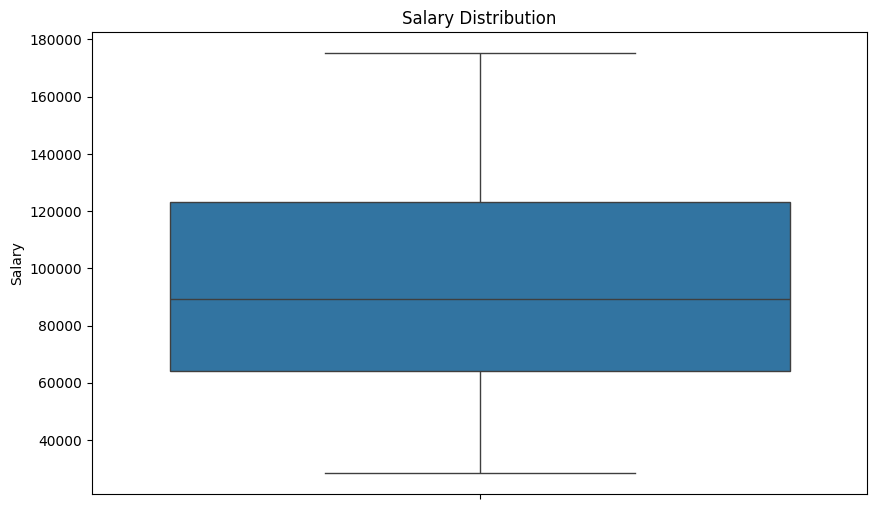

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the salary distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data_cleaned['Salary'])
plt.title('Salary Distribution')
plt.show()


1. The salary data appears to be mostly centered around the 90,000 range.
2. No extreme salary outliers are visible, indicating the data is fairly clean in terms of salary values after applying noise reduction.
3. The interquartile range (IQR) is from 64,287 to 123,152, suggesting that 50% of the employees fall within this salary range.

In [32]:
# Check basic statistics of the Salary column
print(data_cleaned['Salary'].describe())

count       520.000000
mean      92111.885636
std       35171.434541
min       28418.438366
25%       64287.238472
50%       89241.000000
75%      123152.250000
max      175218.428249
Name: Salary, dtype: float64


Based on the boxplot and summary statistics from the describe() method For example:

Minimum salary: A reasonable lower bound might be around $20,000.

Maximum salary: The upper bound could be around $300,000, based on typical salary ranges.


In [33]:
# Define a reasonable salary range (for example, between 20,000 and 300,000)
min_salary = 20000
max_salary = 300000

In [34]:
# Remove rows where Salary is outside the defined reasonable range
data_cleaned = data_cleaned[(data_cleaned['Salary'] >= min_salary) & (data_cleaned['Salary'] <= max_salary)]

# Verify the cleaned salary data
print("Salary column after handling noise:")
print(data_cleaned['Salary'].describe())

Salary column after handling noise:
count       520.000000
mean      92111.885636
std       35171.434541
min       28418.438366
25%       64287.238472
50%       89241.000000
75%      123152.250000
max      175218.428249
Name: Salary, dtype: float64


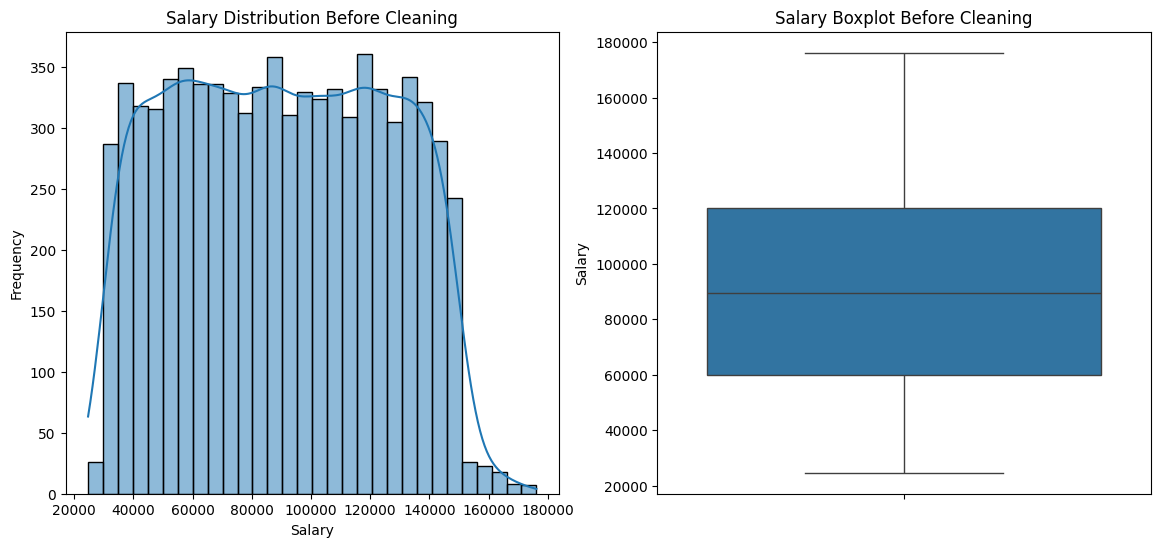

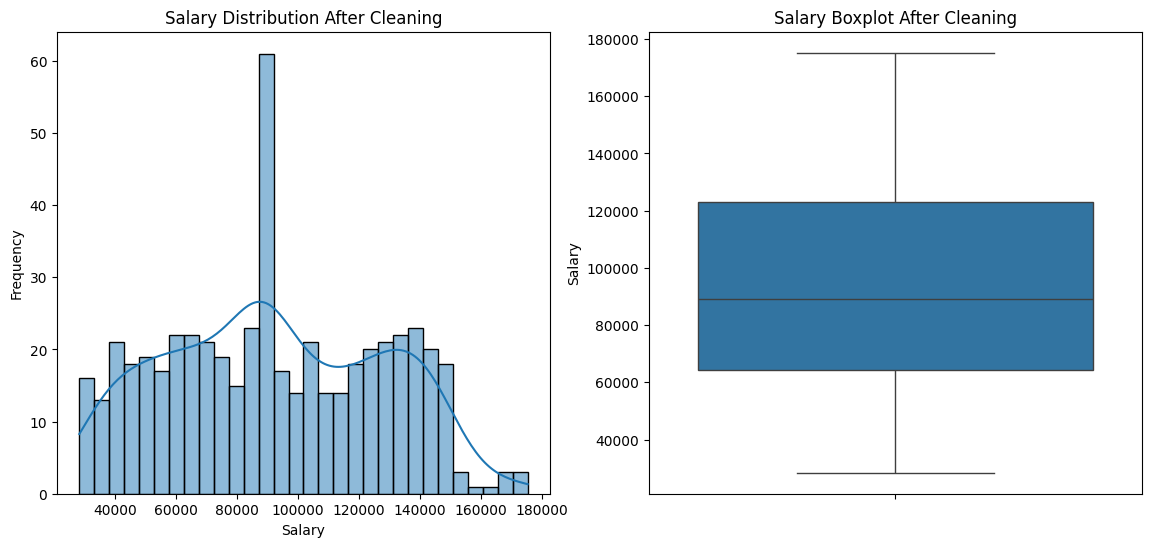

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the salary distribution before removing outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Salary'], bins=30, kde=True)
plt.title('Salary Distribution Before Cleaning')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data['Salary'])
plt.title('Salary Boxplot Before Cleaning')
plt.ylabel('Salary')

plt.show()

# Visualize the salary distribution after removing outliers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Salary'], bins=30, kde=True)
plt.title('Salary Distribution After Cleaning')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data_cleaned['Salary'])
plt.title('Salary Boxplot After Cleaning')
plt.ylabel('Salary')

plt.show()


Before Cleaning:

The salary distribution before cleaning showed a relatively uniform spread of values, with most salaries ranging between 60,000 and 120,000.
The boxplot highlighted a typical range of salaries, with no major outliers visible. The interquartile range (IQR) spanned between approximately 64,000 to 123,000.
After Cleaning (Removal of Out-of-Range Salaries):

The cleaning process involved filtering out rows where the salary was outside a defined range (i.e., between min_salary and max_salary). This step removed salary values that were deemed unreasonable or extreme.
As seen in the salary distribution after cleaning, the concentration of salaries has increased, particularly around the median (around 100,000). The distribution became more focused, likely because salaries that were too high or too low were removed.
The boxplot after cleaning remains similar in shape to the pre-cleaning boxplot, indicating that the removal of extreme salary values did not drastically change the overall range. The whiskers and IQR still cover similar salary ranges, but the distribution of values is now more concentrated.


Key Points:
The process of removing salary values outside the defined range helped concentrate the salary distribution, as seen in the histogram, especially around the median.
The boxplot shows that there were no major outliers originally, but the removal of certain entries slightly refined the overall salary distribution.
This method helped ensure that only salaries within a reasonable range were retained, leading to a more coherent dataset for analysis.



<div style="background-color:green; padding: 10px; border-radius: 5px;text-align: center;">
<h3 style="color: white;">DOCUMENTATION</h3>
</div>

##### Missing Data in Critical Columns

- Assumption: Missing values in columns like Name, Email, Join Date, Department, and Salary are critical for analysis. If these columns had missing values, they were considered unusable, and the corresponding rows were removed.
- Method Used: Used dropna() to remove rows with missing values in critical columns, while for less critical columns like Age, missing values were imputed with the median.

##### Assumption: Name Fields Contain Extraneous Characters
- Assumption: The Name column might contain extraneous words or characters (e.g., leading/trailing spaces, uncapitalized names) that needed to be cleaned for consistency.
- Method Used: Standardized names by stripping spaces and capitalizing each name.

##### Dates in Join Date Column
- Assumption: All dates in the Join Date column should follow the YYYY-MM-DD format to ensure consistency across the dataset.
- Method Used: Used pd.to_datetime() to standardize the date format and handled invalid date formats by coercing errors.

##### Department Name Standardization
- Assumption: Typos in the Department column could exist, and standard department names should be limited to HR, Engineering, Marketing, Sales, and Support.
- Method Used: Mapped and replaced erroneous department names with the correct standardized names.

##### Salary Range Validity
- Assumption: The salary should fall within a reasonable range. Based on domain knowledge or statistical measures (like the interquartile range), values outside of a minimum (20,000) and maximum (300,000) were considered noise and removed.
- Method Used: Filtered out salaries that fell outside of the defined bounds.

##### Removal of Duplicate Records
- Assumption: Any duplicate rows in the dataset represented redundant information and should be removed to maintain data integrity.
- Method Used: Identified and removed duplicate records based on all columns.
